<a href="https://colab.research.google.com/github/NabilaAisha/Nasha.github.io/blob/main/Data%20Preprocessing%20%2B%20Feature%20Engineering%20%2B%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment Module 2: Data Preprocessing**



##**Importing Libraries**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Importing Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [ ]:
#Melihat data head dari data heart
data.head() #Melihat isi data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

Memanggil tabel data

In [ ]:
data #new data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [ ]:
print(data.head()) #Melihat gambaran awal data

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


#**1. Menentukan business problems, metric and goals**

Business problems : Meningkatkan deteksi dini penyakit jantung untuk meningkatkan kualitas hidup pasien

Metric :
Akurasi deteksi dini: Persentase kasus penyakit jantung yang berhasil dideteksi dengan tepat waktu, dalam rangka meningkatkan prognosis dan pengobatan yang lebih efektif.


Goals : Meningkatkan model akurasi > 75%


# **2. Workflow**

##**3. Handling Missing Values, Outliers dan Imbalance data**

Cek jumlah missing value!

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Melalui handling missing values, didapatkan bahwa tidak terdapat missing values sehingga tidak perlu dihandling

##**Melihat Outlier**

In [ ]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

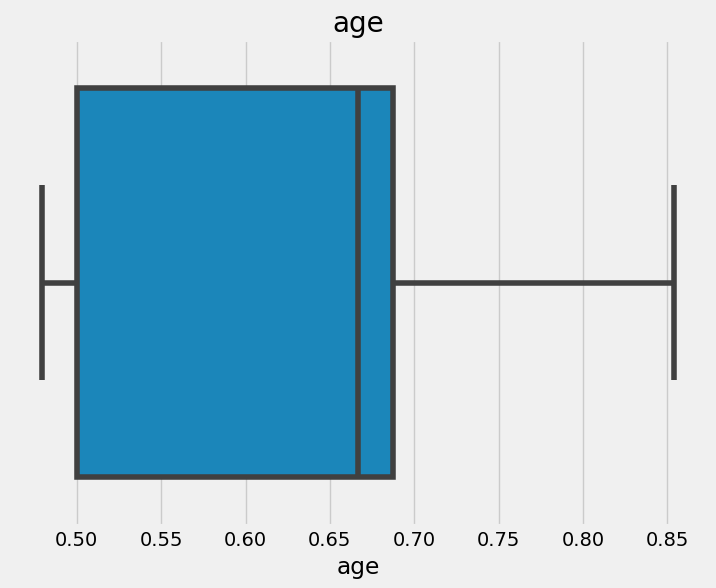

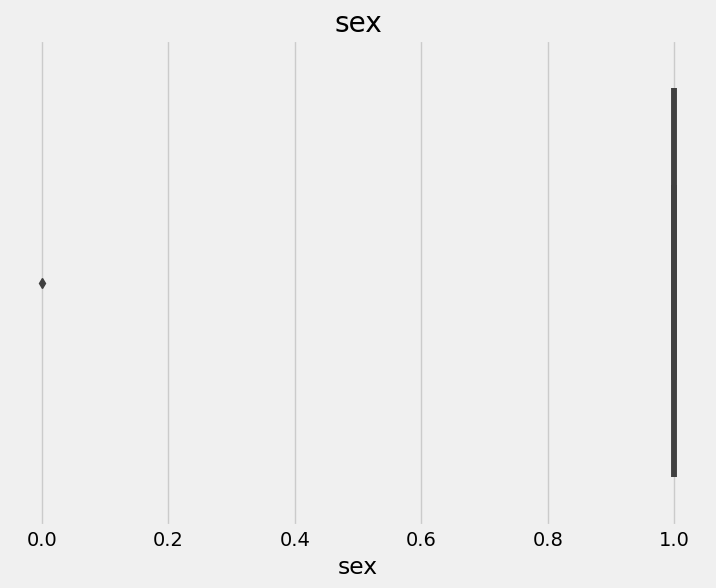

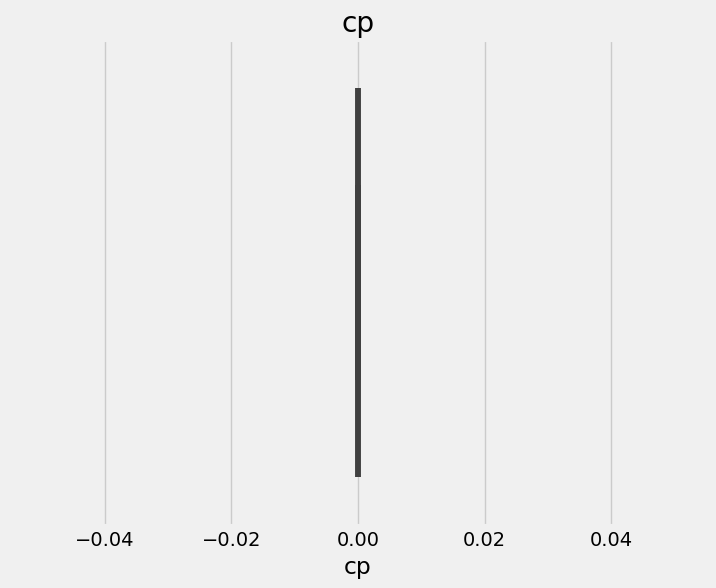

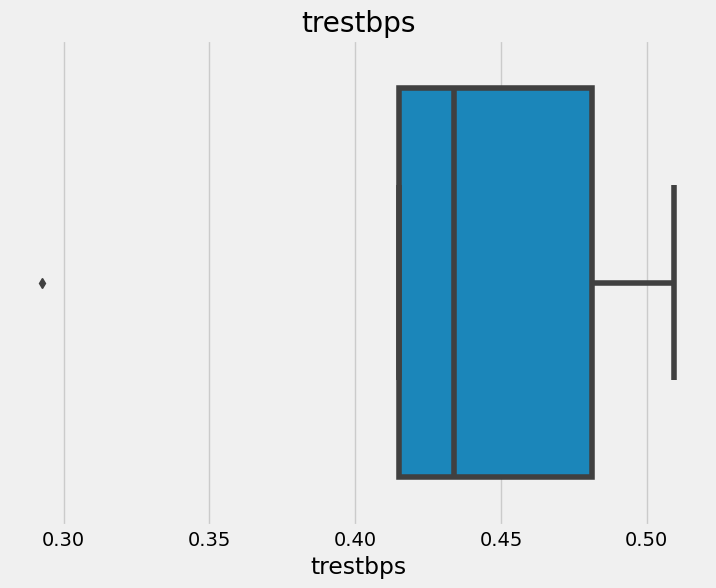

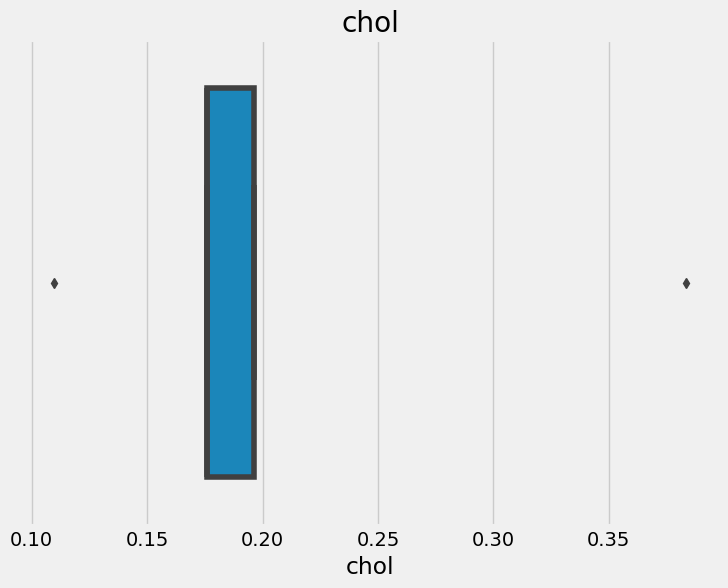

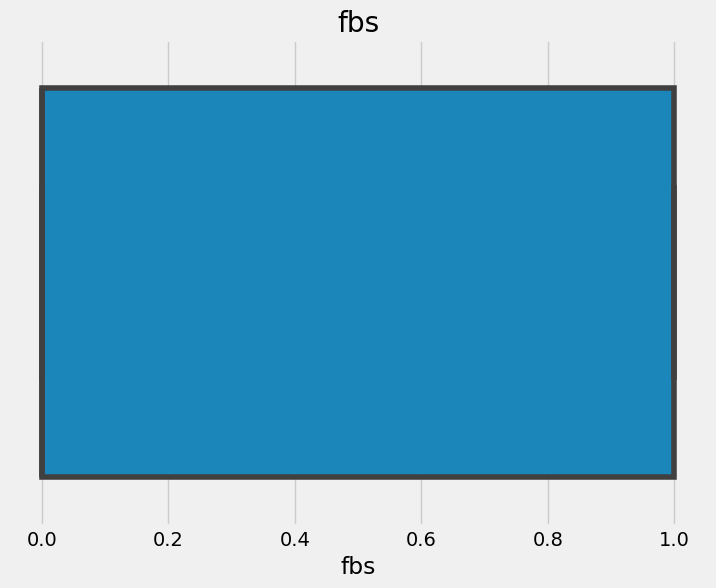

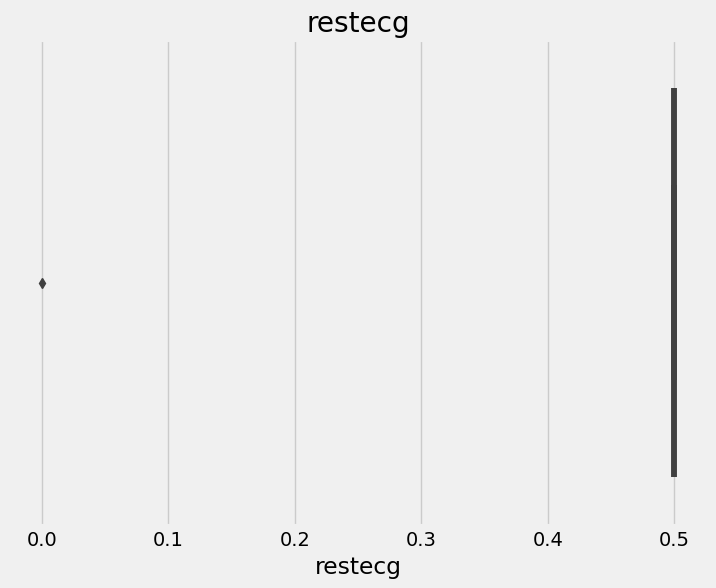

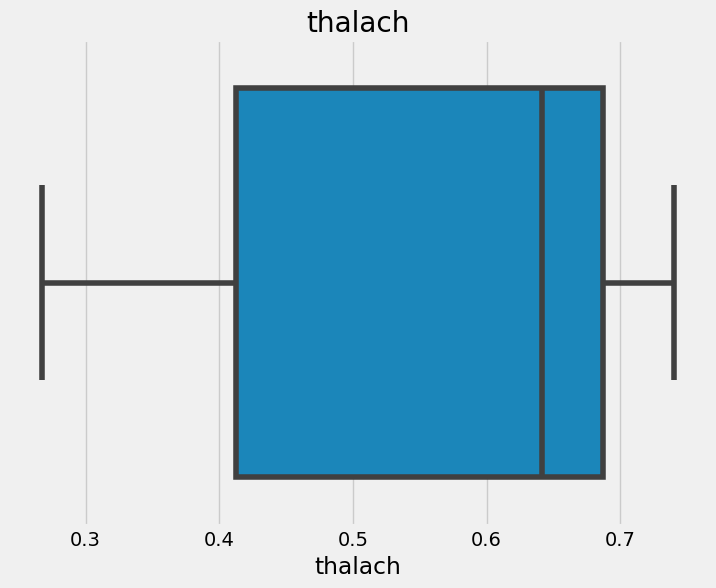

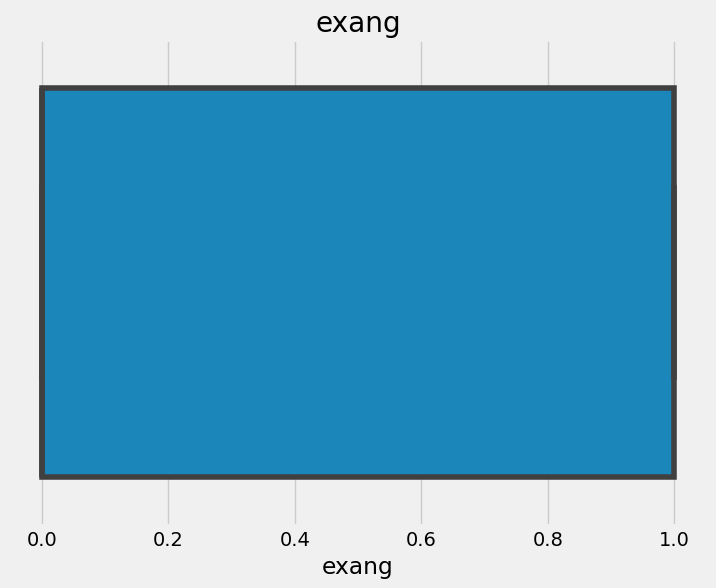

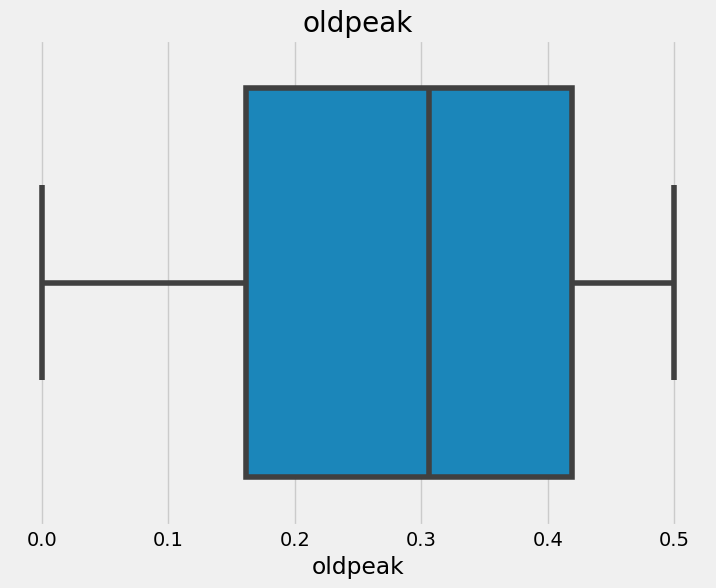

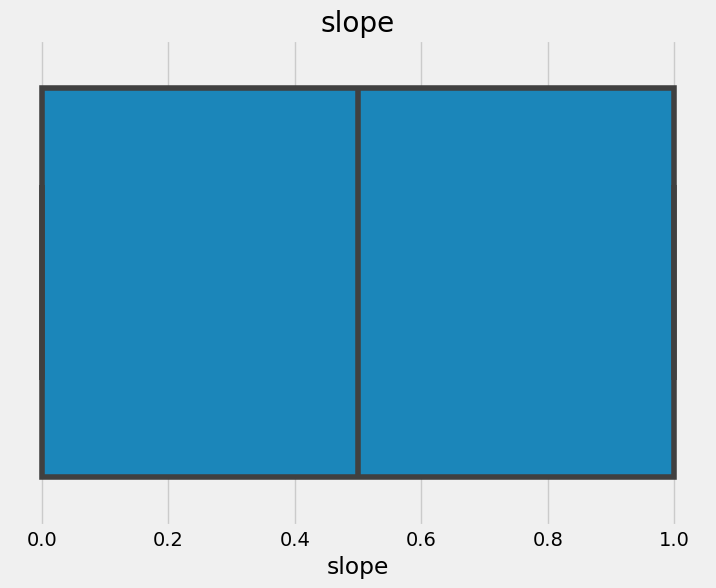

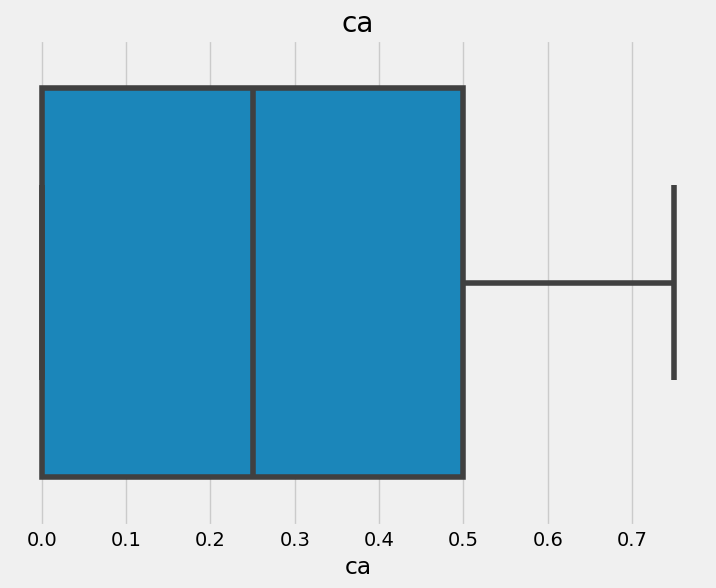

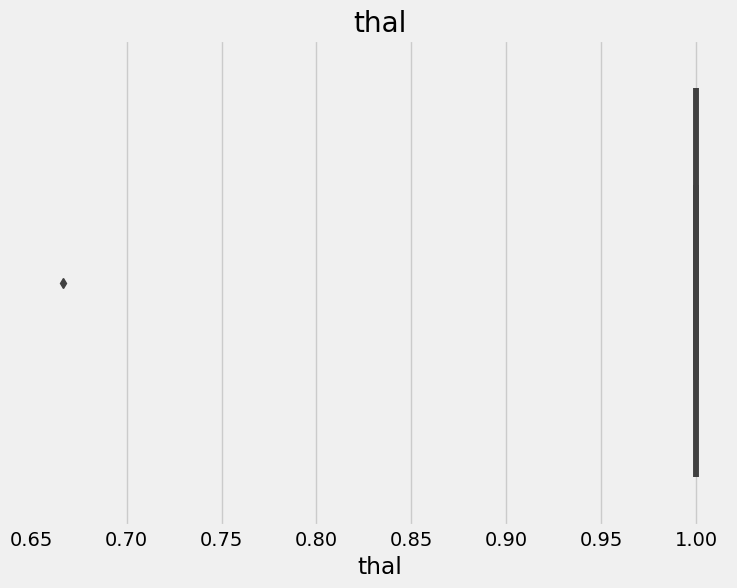

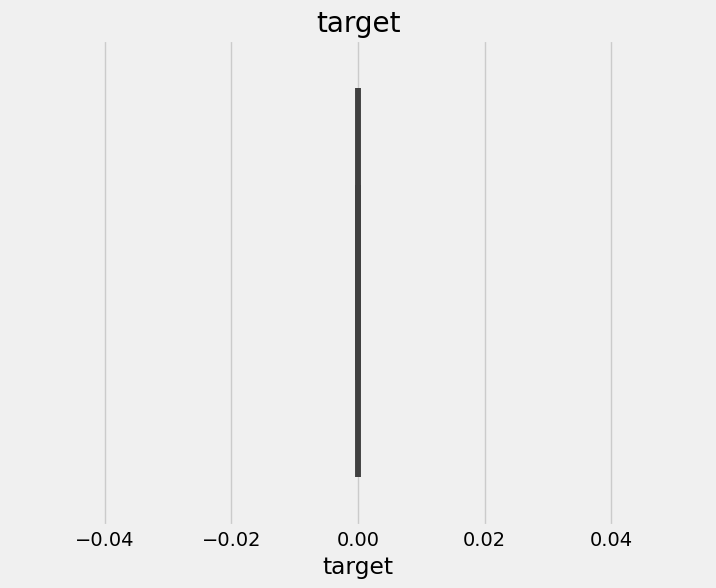

chol        2
sex         1
trestbps    1
restecg     1
thal        1
Name: variable, dtype: int64


In [ ]:
df=data.head()
df
# Check for outliers using a box plot for each variable
for col in df.columns:
    if df[col].dtype != 'object': # Check if column is numeric
        plt.figure(figsize=(8,6))
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()
def find_outliers_IQR(df):
    outliers = pd.DataFrame()
    for col in df.columns:
        if df[col].dtype != 'object':  # Check if column is numeric
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            IQR = q3 - q1
            outliers_col = df[((df[col] < (q1 - 1.5 * IQR)) | (df[col] > (q3 + 1.5 * IQR)))]
            outliers_col['variable'] = col
            outliers = pd.concat([outliers, outliers_col])
    return outliers

# Call the function to find outliers in your data
outliers = find_outliers_IQR(df)

# Print the number of outliers found for each variable
print(outliers['variable'].value_counts())

Variabel yang memiliki outlier adalah variabel 'chol', 'sex', 'trestbps', 'restecg', dan 'thal'. Dikarenakan outlier berjumlah sedikit, maka bisa di drop saja

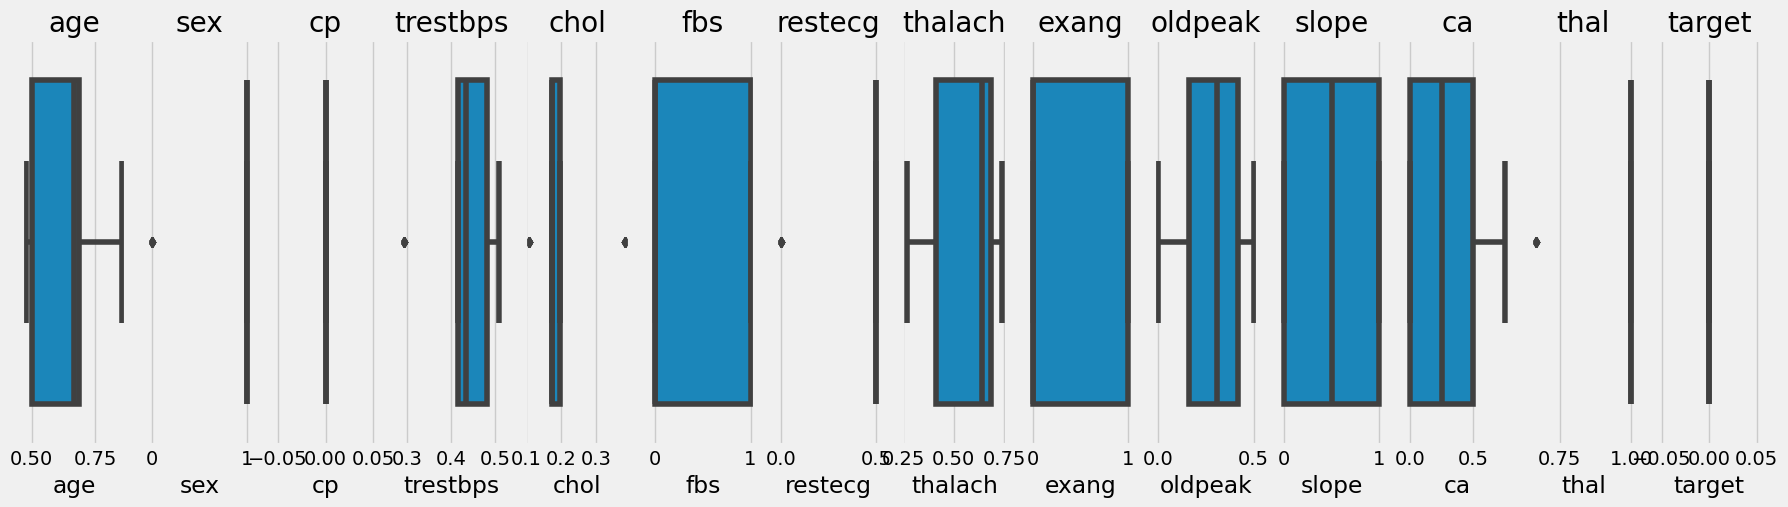

In [ ]:
def drop_outliers_IQR(df):
    not_outliers = pd.DataFrame()
    for col in df.columns:
        if df[col].dtype != 'object':  # Check if column is numeric
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            IQR = q3 - q1
            not_outliers_col = df[~((df[col] < (q1 - 1.5 * IQR)) | (df[col] > (q3 + 1.5 * IQR)))]
            not_outliers = pd.concat([not_outliers, not_outliers_col])
    return not_outliers

# Call the function to drop outliers in your data
not_outliers = drop_outliers_IQR(df)

# Check for remaining outliers using a box plot for each variable
fig, axs = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(20,5))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':  # Check if column is numeric
        sns.boxplot(x=not_outliers[col], ax=axs[i])
        axs[i].set_title(col)

##**Melihat Data Imbalance**

In [ ]:
#Melihat data imbalance pada seluruh kolom
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("heart.csv")

for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is categorical
        print("Value counts for " + col + " column:")
        print(df[col].value_counts())
    else:
        print("Imbalance percentage for " + col + " column:")
        print(df[col].value_counts(normalize=True) * 100)


Imbalance percentage for age column:
58    6.634146
57    5.560976
54    5.170732
59    4.487805
52    4.195122
51    3.804878
56    3.804878
62    3.609756
60    3.609756
44    3.512195
64    3.317073
41    3.121951
63    3.121951
67    3.024390
61    3.024390
55    2.926829
65    2.634146
43    2.536585
42    2.536585
53    2.536585
66    2.439024
45    2.439024
48    2.243902
46    2.243902
50    2.048780
47    1.756098
49    1.658537
35    1.463415
39    1.365854
70    1.365854
68    1.170732
38    1.170732
71    1.073171
40    1.073171
69    0.878049
37    0.585366
34    0.585366
29    0.390244
76    0.292683
77    0.292683
74    0.292683
Name: age, dtype: float64
Imbalance percentage for sex column:
1    69.560976
0    30.439024
Name: sex, dtype: float64
Imbalance percentage for cp column:
0    48.487805
2    27.707317
1    16.292683
3     7.512195
Name: cp, dtype: float64
Imbalance percentage for trestbps column:
120    12.487805
130    12.000000
140    10.439024
110     6.24390

Melihat data duplicates

In [ ]:
# mengecek duplikat pada seluruh kolom
if df.duplicated().any():
    print("Dataset memiliki duplikat pada seluruh kolom")
else:
    print("Dataset tidak memiliki duplikat pada seluruh kolom")
# menampilkan baris duplikat pada dataset
print(df[df.duplicated()])


Dataset memiliki duplikat pada seluruh kolom
      age  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
15     34       118   210    0        1      192      0      0.7      2   0   
31     50       120   244    0        1      162      0      1.1      2   0   
43     46       120   249    0        0      144      0      0.8      2   0   
55     55       140   217    0        1      111      1      5.6      0   0   
61     66       146   278    0        0      152      0      0.0      1   1   
...   ...       ...   ...  ...      ...      ...    ...      ...    ...  ..   
1020   59       140   221    0        1      164      1      0.0      2   0   
1021   60       125   258    0        0      141      1      2.8      1   1   
1022   47       110   275    0        0      118      1      1.0      1   1   
1023   50       110   254    0        0      159      0      0.0      2   0   
1024   54       120   188    0        1      113      0      1.4      1   1   

      

# **Check the descriptive statistics of the dataset (mean, distributions, etc)**

Tampilkan statistik deskriptif dari data!

In [ ]:
dataheart = data
statdes = dataheart.describe(include="all")
print(statdes)

               age          sex           cp     trestbps         chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.529878     0.695610     0.314146     0.354827     0.273973   
std       0.189006     0.460373     0.343214     0.165252     0.117791   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.395833     0.000000     0.000000     0.245283     0.194064   
50%       0.562500     1.000000     0.333333     0.339623     0.260274   
75%       0.666667     1.000000     0.666667     0.433962     0.340183   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.264878     0.596291     0.336585     0.172825   
std       0.356527     0.263939     0.175616     0.472772     0.189525   
min       0.000000     0.000000     0

In [ ]:
data.describe() #Melihat statistik deskriptif

age          sex           cp     trestbps         chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.529878     0.695610     0.314146     0.354827     0.273973   
std       0.189006     0.460373     0.343214     0.165252     0.117791   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.395833     0.000000     0.000000     0.245283     0.194064   
50%       0.562500     1.000000     0.333333     0.339623     0.260274   
75%       0.666667     1.000000     0.666667     0.433962     0.340183   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.264878     0.596291     0.336585     0.172825   
std       0.356527     0.263939     0.175616     0.472772     0.189525   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.465649     0.000000     0.000000   
50%       0.000000     0.500000     0.618321     0.000000     0.129032   
75%       0.000000     0.500000     0.725191     1.000000     0.290323   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      0.692683     0.188537     0.774634     0.513171  
std       0.308878     0.257699     0.206887     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.500000     0.000000     0.666667     0.000000  
50%       0.500000     0.000000     0.666667     1.000000  
75%       1.000000     0.250000     1.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000

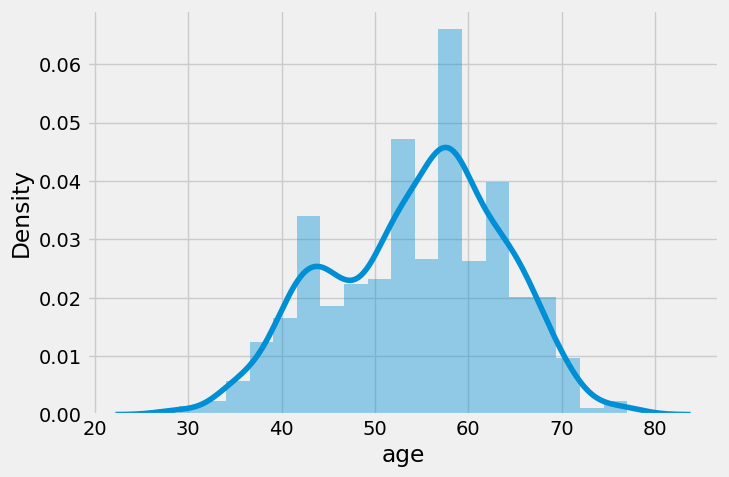

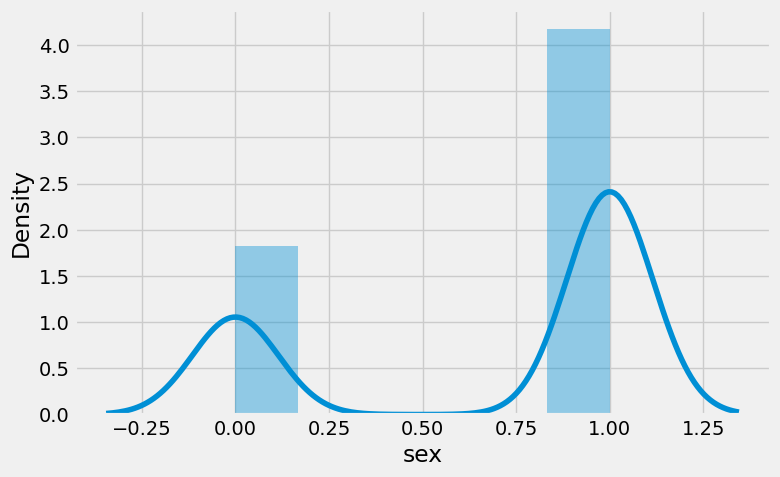

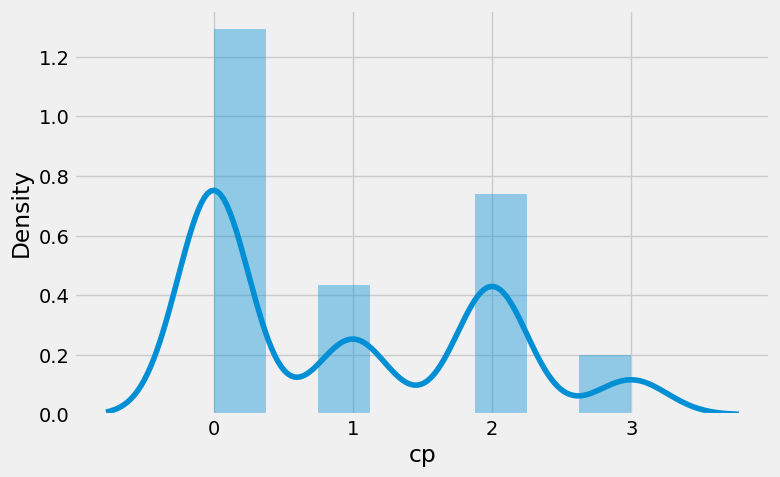

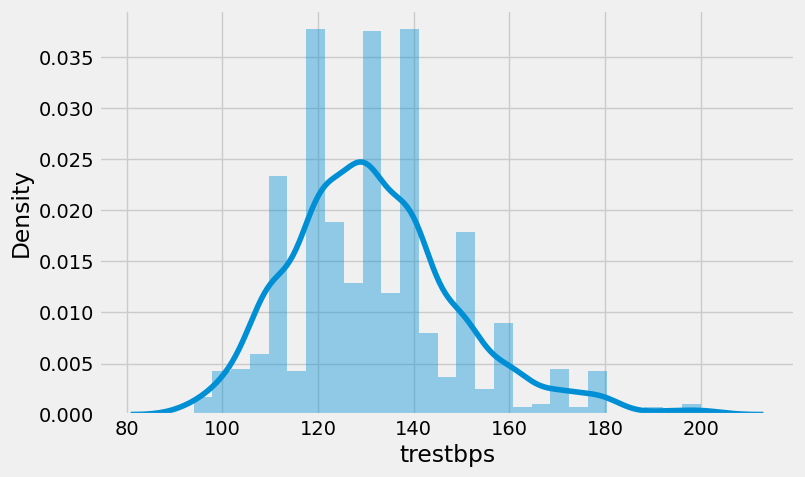

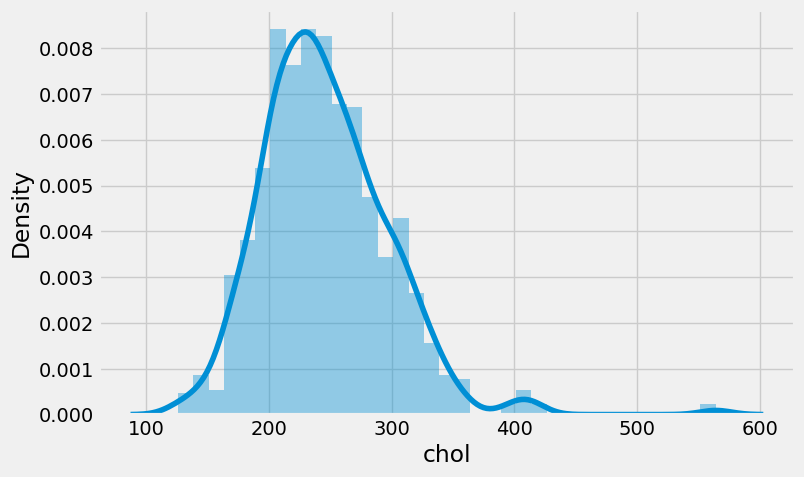

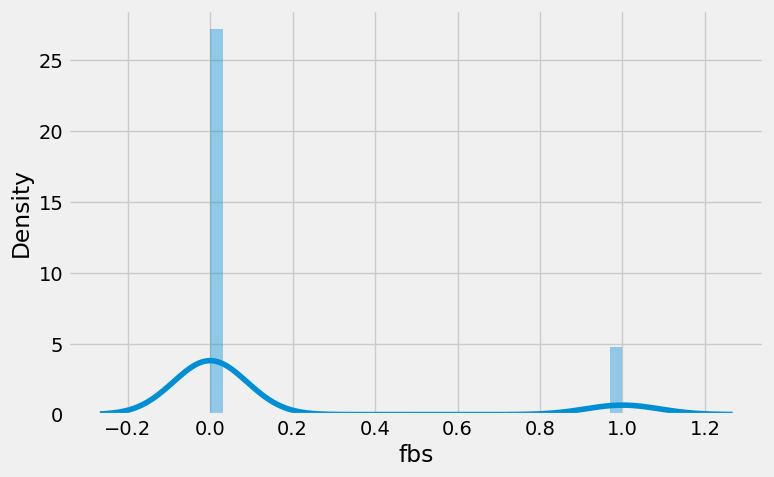

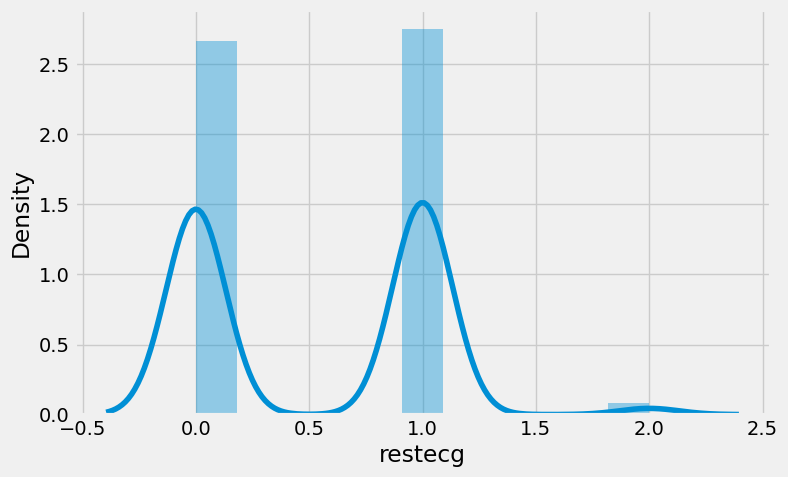

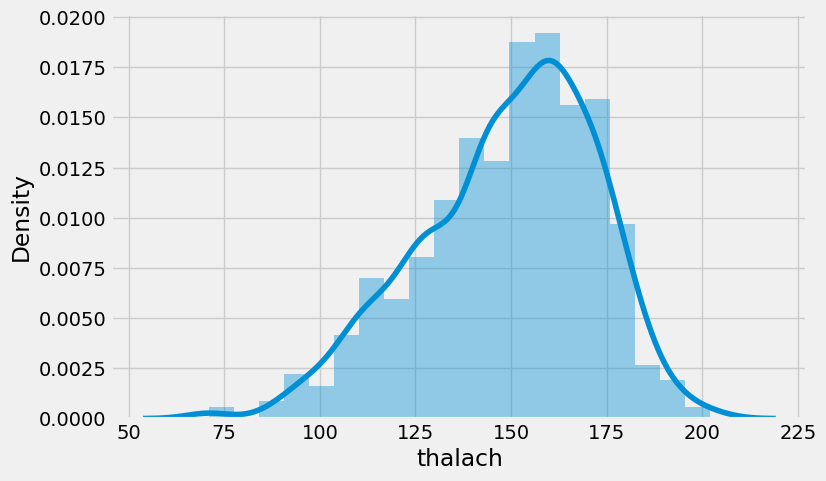

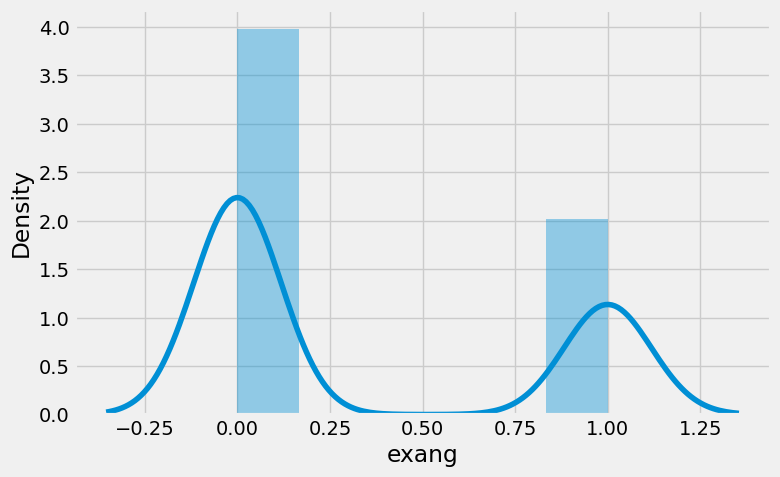

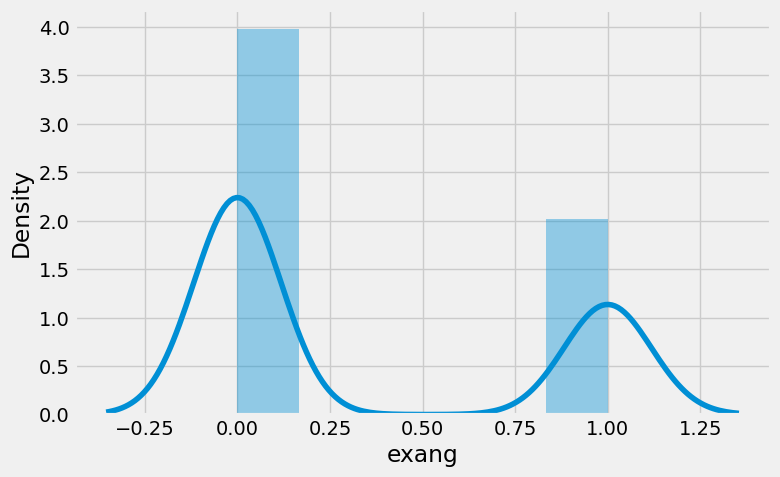

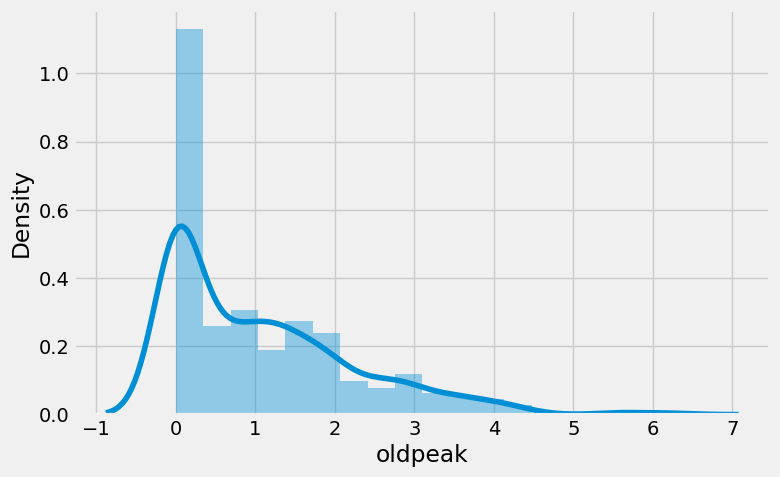

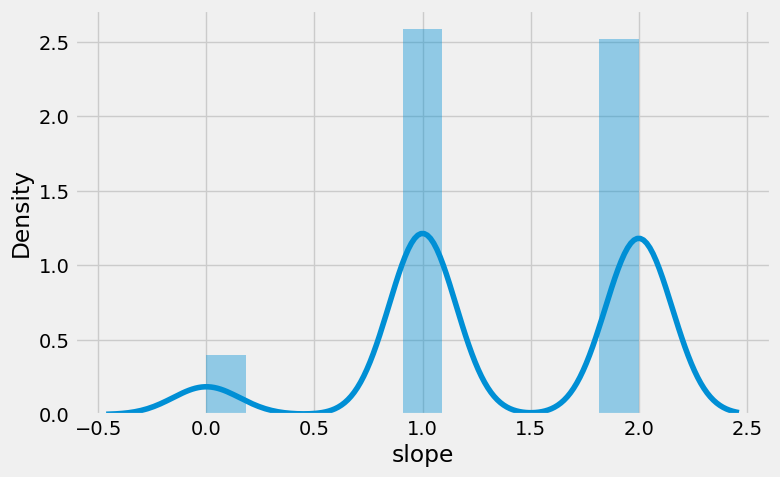

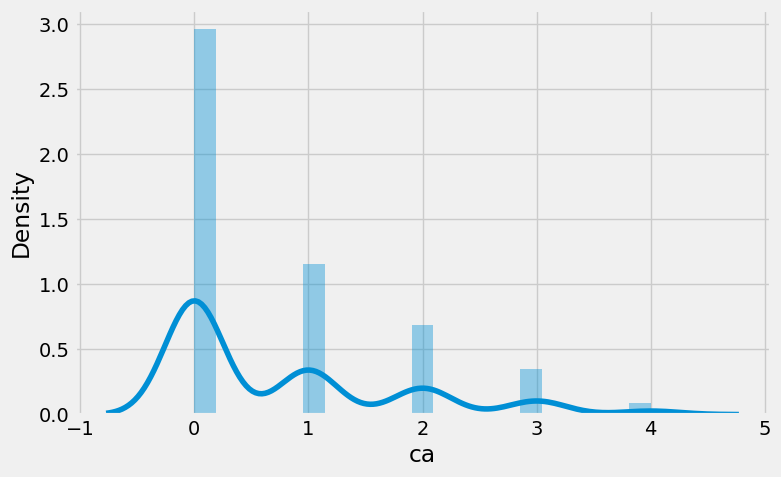

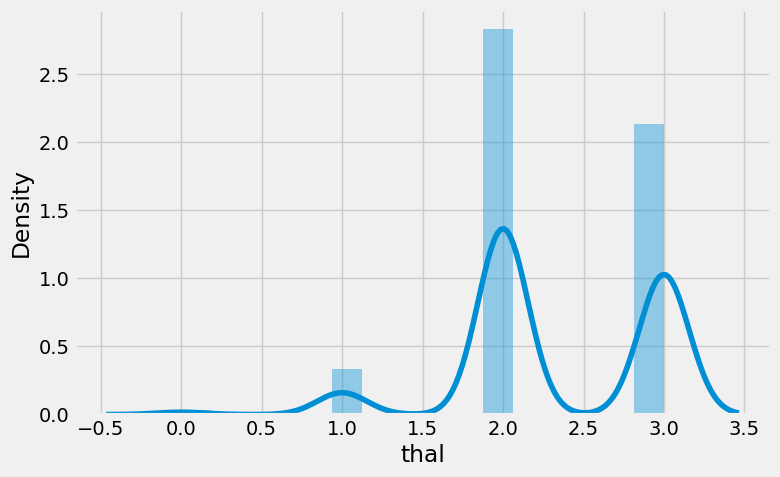

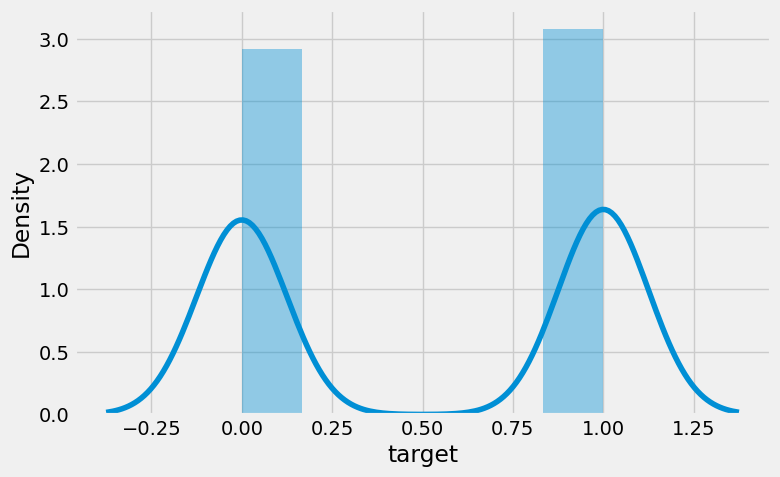

In [ ]:
#Distribution Plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['age'])
plt.show()
sns.distplot(df['sex'])
plt.show()
sns.distplot(df['cp'])
plt.show()
sns.distplot(df['trestbps'])
plt.show()
sns.distplot(df['chol'])
plt.show()
sns.distplot(df['fbs'])
plt.show()
sns.distplot(df['restecg'])
plt.show()
sns.distplot(df['thalach'])
plt.show()
sns.distplot(df['exang'])
plt.show()
sns.distplot(df['exang'])
plt.show()
sns.distplot(df['oldpeak'])
plt.show()
sns.distplot(df['slope'])
plt.show()
sns.distplot(df['ca'])
plt.show()
sns.distplot(df['thal'])
plt.show()
sns.distplot(df['target'])
plt.show()

##**5**. Korelasi

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

<Axes: >

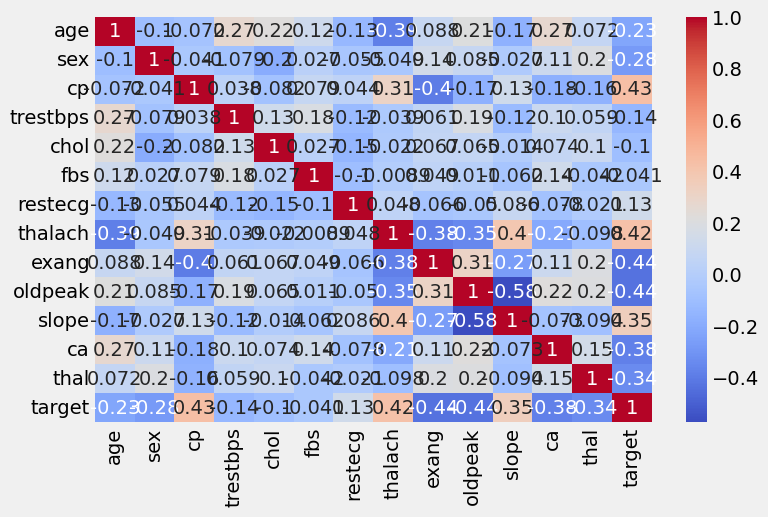

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)
# Display the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#Melalui heatmap, dapat dilihat bahwa korelasi kuat terbanyak berada pada variabel X lainnya dengan variabel ca.

# **6. Feature Engineering**

In [ ]:
# install library
!pip install featuretools
import featuretools as ft
import pandas as pd
import datetime as dt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.9/956.9 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 951.2/951.2 KB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 945.4/945.4 KB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 945.2/945.2 KB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.8/934.8 KB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.1/934.1 KB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.0/933.0 KB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.3/925.3 KB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 923.4/923.4 KB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 923.8/923.8 KB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.2/918.2 KB 38.2 MB/s eta 0:00:00
     ━━━━━

In [ ]:
corr_matrix = df.corr().abs()

# Pilih fitur dengan korelasi tinggi
high_corr_features = np.where(corr_matrix > 0.7)

# Pilih fitur dengan korelasi tinggi
high_corr_features = np.where(corr_matrix > 0.7)

# Hapus fitur yang redundan
high_corr_features = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y]
data = data.drop(columns=[y for x, y in high_corr_features])

corr_matrix


age       sex        cp  trestbps      chol       fbs  \
age       1.000000  0.103240  0.071966  0.271121  0.219823  0.121243   
sex       0.103240  1.000000  0.041119  0.078974  0.198258  0.027200   
cp        0.071966  0.041119  1.000000  0.038177  0.081641  0.079294   
trestbps  0.271121  0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823  0.198258  0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg   0.132696  0.055117  0.043581  0.123794  0.147410  0.104051   
thalach   0.390227  0.049365  0.306839  0.039264  0.021772  0.008866   
exang     0.088163  0.139157  0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687  0.174733  0.187434  0.064880  0.010859   
slope     0.169105  0.026666  0.131633  0.120445  0.014248  0.061902   
ca        0.271551  0.111729  0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424  0.163341  0.059276  0.100244  0.042177   
target    0.229324  0.279501  0.434854  0.138772  0.099966  0.041164   

           restecg   thalach     exang   oldpeak     slope        ca  \
age       0.132696  0.390227  0.088163  0.208137  0.169105  0.271551   
sex       0.055117  0.049365  0.139157  0.084687  0.026666  0.111729   
cp        0.043581  0.306839  0.401513  0.174733  0.131633  0.176206   
trestbps  0.123794  0.039264  0.061197  0.187434  0.120445  0.104554   
chol      0.147410  0.021772  0.067382  0.064880  0.014248  0.074259   
fbs       0.104051  0.008866  0.049261  0.010859  0.061902  0.137156   
restecg   1.000000  0.048411  0.065606  0.050114  0.086086  0.078072   
thalach   0.048411  1.000000  0.380281  0.349796  0.395308  0.207888   
exang     0.065606  0.380281  1.000000  0.310844  0.267335  0.107849   
oldpeak   0.050114  0.349796  0.310844  1.000000  0.575189  0.221816   
slope     0.086086  0.395308  0.267335  0.575189  1.000000  0.073440   
ca        0.078072  0.207888  0.107849  0.221816  0.073440  1.000000   
thal      0.020504  0.098068  0.197201  0.202672  0.094090  0.149014   
target    0.134468  0.422895  0.438029  0.438441  0.345512  0.382085   

              thal    target  
age       0.072297  0.229324  
sex       0.198424  0.279501  
cp        0.163341  0.434854  
trestbps  0.059276  0.138772  
chol      0.100244  0.099966  
fbs       0.042177  0.041164  
restecg   0.020504  0.134468  
thalach   0.098068  0.422895  
exang     0.197201  0.438029  
oldpeak   0.202672  0.438441  
slope     0.094090  0.345512  
ca        0.149014  0.382085  
thal      1.000000  0.337838  
target    0.337838  1.000000

**Setelah dilakukan feature engineering, dengan cara membuang fitur yang redundan, didapatkan bahwa korelasi tertinggi antara variabel X dengan salah satu variabel yakni adalah pada variabel Thalach. Sehingga, jika dilakukan analisis, akan lebih baik untuk mengambil variabel Thalach sebagai variabel Y dan lainnya sebagai variabel X. Pembuangan fitur yang redundan ini diperuntukkan untuk mengurangi kemungkinan overfitting dan meningkatkan akurasi model**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Load data
data = pd.read_csv('heart.csv')

# Normalisasi data
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
print(data)

           age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0     0.479167  1.0  0.000000  0.292453  0.196347  0.0      0.5  0.740458   
1     0.500000  1.0  0.000000  0.433962  0.175799  1.0      0.0  0.641221   
2     0.854167  1.0  0.000000  0.481132  0.109589  0.0      0.5  0.412214   
3     0.666667  1.0  0.000000  0.509434  0.175799  0.0      0.5  0.687023   
4     0.687500  0.0  0.000000  0.415094  0.383562  1.0      0.5  0.267176   
...        ...  ...       ...       ...       ...  ...      ...       ...   
1020  0.625000  1.0  0.333333  0.433962  0.216895  0.0      0.5  0.709924   
1021  0.645833  1.0  0.000000  0.292453  0.301370  0.0      0.0  0.534351   
1022  0.375000  1.0  0.000000  0.150943  0.340183  0.0      0.0  0.358779   
1023  0.437500  0.0  0.000000  0.150943  0.292237  0.0      0.0  0.671756   
1024  0.520833  1.0  0.000000  0.245283  0.141553  0.0      0.5  0.320611   

      exang   oldpeak  slope    ca      thal  target  
0       0.0  0.16129

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define features to be scaled
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the features
df[features] = scaler.fit_transform(df[features])
print(df[features])

           age  trestbps      chol   thalach   oldpeak
0    -0.268437 -0.377636 -0.659332  0.821321 -0.060888
1    -0.158157  0.479107 -0.833861  0.255968  1.727137
2     1.716595  0.764688 -1.396233 -1.048692  1.301417
3     0.724079  0.936037 -0.833861  0.516900 -0.912329
4     0.834359  0.364875  0.930822 -1.874977  0.705408
...        ...       ...       ...       ...       ...
1020  0.503520  0.479107 -0.484803  0.647366 -0.912329
1021  0.613800 -0.377636  0.232705 -0.352873  1.471705
1022 -0.819834 -1.234378  0.562371 -1.353113 -0.060888
1023 -0.488996 -1.234378  0.155137  0.429923 -0.912329
1024 -0.047877 -0.663216 -1.124743 -1.570556  0.279688

[1025 rows x 5 columns]


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('heart.csv')

# Define categorical features to be encoded
categorical_features = ['sex', 'cp']

# Create an encoder object
encoder = OneHotEncoder(drop='first')

# Fit and transform the categorical features
encoded = encoder.fit_transform(df[categorical_features]).toarray()

# Create new column names for the encoded features
new_cols = [f'{col}_{val}' for col in categorical_features for val in encoder.categories_[categorical_features.index(col)][1:]]

# Add the encoded features to the original dataset
df[new_cols] = encoded
df = df.drop(columns=categorical_features)

# Create a new feature that combines trestbps and chol
df['trestbps/chol'] = df['trestbps'] / df['chol']

# Create a new feature that combines thalach and oldpeak
df['thalach*oldpeak'] = df['thalach'] * df['oldpeak']

# Create a new feature that combines age, thalach, and trestbps
df['age*thalach*trestbps'] = df['age'] * df['thalach'] * df['trestbps']

print(df.head())


   age  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0   52       125   212    0        1      168      0      1.0      2   2   
1   53       140   203    1        0      155      1      3.1      0   0   
2   70       145   174    0        1      125      1      2.6      0   0   
3   61       148   203    0        1      161      0      0.0      2   1   
4   62       138   294    1        1      106      0      1.9      1   3   

   thal  target  sex_1  cp_1  cp_2  cp_3  trestbps/chol  thalach*oldpeak  \
0     3       0    1.0   0.0   0.0   0.0       0.589623            168.0   
1     3       0    1.0   0.0   0.0   0.0       0.689655            480.5   
2     3       0    1.0   0.0   0.0   0.0       0.833333            325.0   
3     3       0    1.0   0.0   0.0   0.0       0.729064              0.0   
4     2       0    0.0   0.0   0.0   0.0       0.469388            201.4   

   age*thalach*trestbps  
0               1092000  
1               1150100  
2       



# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install dask==2022.3.0
!pip install dataprep


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2022.12.1
    Uninstalling dask-2022.12.1:
      Successfully uninstalled dask-2022.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.12.1 requires dask==2022.12.1, but you have dask 2022.3.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 27.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



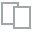
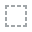
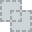
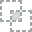
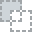
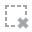
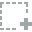
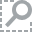
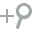
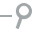
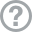
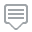
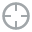
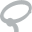
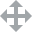
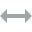
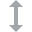
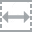
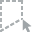
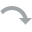
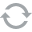
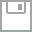
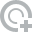
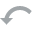
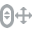
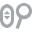
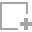
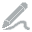
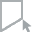
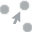
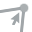
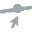

In [ ]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
create_report(df).show()